# IMMOWEB PROJECT: EXPLORATORY DATA ANALYSIS

In [3]:
# Set the notebook to show all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#from ydata_profiling import ProfileReport

# This is for reading the locality name properly. In avoiding the encoding error
import os

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Pandas options for data wrangling and output set-up 
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.expand_frame_repr', False) # print all columns and in the same line
pd.set_option('display.max_colwidth', None) # display the full content of each cell
pd.set_option('display.float_format', lambda x: '%.2f' %x) # floats to be displayed with 2 decimal places

# Visualisation libraries and set-up
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Set up visualisation preferences
plt.rcParams['font.family'] = "serif"  # Use serif fonts for plots
sns.set_style('whitegrid')  # Set seaborn grid style
# sns.set_style('darkgrid')

## FUNCTIONS USED RECURRENTLY

In [5]:
# Function to run basic data frame description
def Descriptives(df):
    print("Looking at the shape to see the number of records:", df.shape)
    print("\nDescription of the file to check values range:")
    print(df.describe().transpose())
    print("\nAttributes and respective data types:")
    print(df.info())

def MemOptimisation(df):
    print(f"\nAmount of memory used by all attributes: {df.memory_usage(deep=True).sum()}\n")
    
    # Optimise memory usage
    for i in categoric_cols:
        df[i] = df[i].astype('category')
    for i in numeric_cols:
        df[i] = pd.to_numeric(df[i], downcast='integer')
        df[i] = pd.to_numeric(df[i], downcast='float')    

    print(df.info(memory_usage='deep'))
    print("\nAmount of memory used now by all attributes: ",df.memory_usage(deep=True).sum())
    
# Function to check the missing values (NaNs)
def Missing(df):
    try:
        assert df.notnull().all().all()
        print("Good news! There are no missing values.")
    
    except AssertionError:
        print("Count of missing values:")
        print(df.isna().sum())
        print("\nPercentage of missing values:")
        print(df.isna().mean().round(4)*100, "\n")



In [6]:
def Plot_numeric(x):
    
    print(f'\n*** {x.upper()} ***')
    
    fig = plt.figure(figsize=(15, 3))
    
    plt.subplot(121)
    sns.distplot(df[x], color = 'salmon')
    plt.xlabel('')
    plt.title(f'{x} Distribution')
    
    plt.subplot(122)
    sns.boxplot(x=df[x], color = 'salmon', width=0.4, linewidth=2) 
    plt.xlabel('')
    plt.title(f'{x} Boxplot')
    
    plt.show()

In [7]:
def Plot_category(x):
    print(f'\n*** {x.upper()} ***')

    # Sort the categories by count
    order = df[x].value_counts().index

    fig, ax = plt.subplots(figsize=(10, 3))

    sns.countplot(data=df, y=df[x], order=order, color='salmon', width=0.4, ax=ax)

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'{x.upper()} COUNT')

    # Add count labels to bars
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,
                f'{count:,}', va='center')

    plt.show()

In [8]:
# # 1. Input & Output paths
# input_path = r"D:\Projects\BXL-Bouman-9\challenge-data-analysis\data\raw\immoweb_dataset.csv"
# output_path = r"D:\Projects\BXL-Bouman-9\challenge-data-analysis\data\cleaned\immoweb_dataset_cleaned.csv"

# # Check input file exists
# if not os.path.exists(input_path):
#     raise FileNotFoundError(f"Input file is not found: {input_path}")

# # 2. Read CSV with multiple encodings
# encodings = ["utf-8", "utf-8-sig", "ISO-8859-1", "latin1", "gbk"]
# df = None
# for enc in encodings:
#     try:
#         df = pd.read_csv(input_path, encoding=enc)
#         print(f"Successfully read the file with encoding:{enc}")
#         break
#     except Exception:
#         continue
# if df is None:
#     raise UnicodeError("Can't read the file with common encodings,please check the file's encode。")


In [11]:
# Load the CSV file
df = pd.read_csv("src/immoweb-dataset.csv")

In [12]:
# Clean up the column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [8]:
Descriptives(df)

Looking at the shape to see the number of records: (80368, 53)

Description of the file to check values range:
                            count        mean        std        min         25%         50%         75%         max
unnamed:_0               80368.00   209681.71  105460.84       0.00   181965.75   235124.50   257006.25   446550.00
id                       80368.00 19529221.31 2897688.01 1882546.00 20350553.25 20529847.50 20614940.75 20664387.00
bedroomcount             73558.00        3.01       1.83       1.00        2.00        3.00        4.00      100.00
bathroomcount            66672.00        1.43       4.56       1.00        1.00        1.00        2.00     1146.00
postcode                 80368.00     5266.59    3045.70    1000.00     2330.00     4830.00     8420.00     9992.00
habitablesurface         67783.00      178.50     820.88       6.00       93.00      140.00      200.00   185347.00
roomcount                21948.00        7.11       5.82       1.00        1.

In [9]:
# Differentiate numerical and categorical cols
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

categoric_cols = df.select_dtypes(exclude=np.number).columns
categoric_cols

Index(['unnamed:_0', 'id', 'bedroomcount', 'bathroomcount', 'postcode',
       'habitablesurface', 'roomcount', 'monthlycost', 'diningroomsurface',
       'buildingconstructionyear', 'facedecount', 'floorcount',
       'streetfacadewidth', 'kitchensurface', 'landsurface',
       'livingroomsurface', 'hasbalcony', 'gardensurface',
       'parkingcountindoor', 'parkingcountoutdoor', 'toiletcount',
       'terracesurface', 'accessibledisabledpeople', 'price'],
      dtype='object')

Index(['url', 'type', 'subtype', 'province', 'locality', 'hasattic',
       'hasbasement', 'hasdressingroom', 'hasdiningroom', 'buildingcondition',
       'haslift', 'floodzonetype', 'heatingtype', 'hasheatpump',
       'hasphotovoltaicpanels', 'hasthermicpanels', 'kitchentype',
       'haslivingroom', 'hasgarden', 'gardenorientation', 'hasairconditioning',
       'hasarmoreddoor', 'hasvisiophone', 'hasoffice', 'hasswimmingpool',
       'hasfireplace', 'hasterrace', 'terraceorientation', 'epcscore'],
      dtype='object')

In [10]:
MemOptimisation(df)


Amount of memory used by all attributes: 113576724

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80368 entries, 0 to 80367
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   unnamed:_0                80368 non-null  float32 
 1   id                        80368 non-null  int32   
 2   url                       80368 non-null  category
 3   type                      80368 non-null  category
 4   subtype                   80368 non-null  category
 5   bedroomcount              73558 non-null  float32 
 6   bathroomcount             66672 non-null  float32 
 7   province                  80368 non-null  category
 8   locality                  80368 non-null  category
 9   postcode                  80368 non-null  int16   
 10  habitablesurface          67783 non-null  float32 
 11  roomcount                 21948 non-null  float32 
 12  monthlycost               0 non-null      float32

In [7]:
Missing(df)

Count of missing values:
Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80368
hasAttic                    67852
hasBasement                 51053
hasDressingRoom             77740
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61324
floodZoneType               35902
heatingType                 33215
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasThermicPanels       

### TARGET VARIABLE: PRICE

In [42]:
Missing(df['price'])

Count of missing values:
3998

Percentage of missing values:
4.97 



In [43]:
# Price is the target variable, we cannot input a value for the missing values
# as we cannot check the reliability of the ML model againt an inputted value: model would be biased
df = df.dropna(subset=['price'])

### UNNAMED

In [44]:
# This is an index variable, as presumabily the data comes from a dataframe that was saved as CSV keeping the index column
dropVar = ['Unnamed']

### ID and URL

In [45]:
# These variables have no value for predicting price: they can be dropped
# But, first checking if there are duplicates
df.duplicated(subset=['id','url'], keep=False).sum()

np.int64(0)

In [46]:
dropVar += ['id', 'url']
dropVar

['Unnamed', 'id', 'url']

### TYPE and SUBTYPE

In [47]:
# Checking the different values in type
df.type.value_counts()

type
HOUSE              45228
APARTMENT          31142
APARTMENT_GROUP        0
HOUSE_GROUP            0
Name: count, dtype: int64

In [48]:
# The variable subtype shows many values, grouping some to reduce cardinality
# Looking first at subtypes of house
houseSub = df.loc[df['type'] == 'HOUSE', ['subtype']]
houseSub.value_counts()

subtype             
HOUSE                   33971
VILLA                    3769
APARTMENT_BLOCK          2454
MIXED_USE_BUILDING       1840
EXCEPTIONAL_PROPERTY      813
MANSION                   544
TOWN_HOUSE                477
BUNGALOW                  427
COUNTRY_COTTAGE           309
FARMHOUSE                 289
CHALET                    166
CASTLE                     68
OTHER_PROPERTY             54
MANOR_HOUSE                46
PAVILION                    1
DUPLEX                      0
APARTMENT                   0
APARTMENT_GROUP             0
KOT                         0
LOFT                        0
GROUND_FLOOR                0
HOUSE_GROUP                 0
FLAT_STUDIO                 0
PENTHOUSE                   0
SERVICE_FLAT                0
TRIPLEX                     0
Name: count, dtype: int64

In [49]:
# Looking now at subtypes of apartment
aptSub = df.loc[df['type'] == 'APARTMENT', ['subtype']]
aptSub.value_counts()

subtype             
APARTMENT               23844
GROUND_FLOOR             1771
DUPLEX                   1691
FLAT_STUDIO              1381
PENTHOUSE                1265
SERVICE_FLAT              449
KOT                       331
LOFT                      259
TRIPLEX                   151
APARTMENT_BLOCK             0
FARMHOUSE                   0
EXCEPTIONAL_PROPERTY        0
COUNTRY_COTTAGE             0
CHALET                      0
BUNGALOW                    0
CASTLE                      0
APARTMENT_GROUP             0
HOUSE_GROUP                 0
MANSION                     0
MANOR_HOUSE                 0
HOUSE                       0
MIXED_USE_BUILDING          0
PAVILION                    0
OTHER_PROPERTY              0
TOWN_HOUSE                  0
VILLA                       0
Name: count, dtype: int64

In [50]:
# Reassigning values
mapping = {
# HOUSE SUBTYPES    
    "HOUSE": "House",
    "VILLA": "House",
    "TOWN_HOUSE": "House",
    "BUNGALOW": "House",
    "PAVILION": "House",
    "COUNTRY_COTTAGE": "Rural",
    "FARMHOUSE": "Rural",
    "CHALET": "Rural",
    "MANOR_HOUSE": "Rural",
    "APARTMENT_BLOCK": "Apartment",
    "MIXED_USE_BUILDING": "Mixed_Use",
    "EXCEPTIONAL_PROPERTY": "Luxury",
    "MANSION": "Luxury",
    "CASTLE": "Luxury",
    "OTHER_PROPERTY": "Other",
# APARTMENT SUBTYPE
    "APARTMENT": "Standard",
    "GROUND_FLOOR": "Standard",
    "FLAT_STUDIO": "Small_Unit",
    "SERVICE_FLAT": "Standard",
    "KOT": "Small_Unit",
    "PENTHOUSE": "Luxury",
    "LOFT": "Luxury",
    "DUPLEX": "Multi-level",
    "TRIPLEX": "Multi-level"
}


# Apply the new categories
df['new_subtype'] = df['subtype'].map(mapping)

In [51]:
ad_types = df[['type', 'new_subtype']]

In [52]:
ad_types.groupby(['type', 'new_subtype']).value_counts()

type             new_subtype
APARTMENT        Apartment          0
                 House              0
                 Luxury          1524
                 Mixed_Use          0
                 Multi-level     1842
                 Other              0
                 Rural              0
                 Small_Unit      1712
                 Standard       26064
APARTMENT_GROUP  Apartment          0
                 House              0
                 Luxury             0
                 Mixed_Use          0
                 Multi-level        0
                 Other              0
                 Rural              0
                 Small_Unit         0
                 Standard           0
HOUSE            Apartment       2454
                 House          38645
                 Luxury          1425
                 Mixed_Use       1840
                 Multi-level        0
                 Other             54
                 Rural            810
                 Smal

This looks much cleaner !!

### GEO VARIABLES: PROVINCE, LOCALITY, POSTCODE & REGION

In [53]:
# 3. Add Region column
flemish = ["Antwerp", "Limburg", "East Flanders", "Flemish Brabant", "West Flanders"]
walloon = ["Hainaut", "Liège", "Luxembourg", "Namur", "Walloon Brabant"]
german_towns = [
        "Eupen", "Kelmis", "Raeren", "Lontzen", "Bütgenbach",
        "Büllingen", "Amel", "Burg-Reuland", "St. Vith"
    ]

def map_region(row):
    loc = str(row["locality"]).strip()
    prov = row["province"]
    if loc in german_towns:
        return "German-speaking Community"
    if prov == "Brussels":
        return "Brussels"
    if prov in flemish:
        return "Flemish Region"
    if prov in walloon:
        return "Walloon Region"
    return "Unknown"

df["region"] = df.apply(map_region, axis=1)

# 4. Move "Region" column to left of "province"
region_series = df.pop("region")
province_idx = df.columns.get_loc("province")
df.insert(province_idx, "region", region_series)

# 5. Strip whitespace in locality,Region,province,postCode
df[["locality", "region", "province", "postcode"]] = df[["locality", "region", "province", "postcode"]].astype(str).apply(lambda x: x.str.strip())


 HabitableSurface, hasAttic, hasBasement,diningRoomSurface, hasDiningRoom, hasLift, epcScore,accessibleDisabledPeople

In [54]:
 # 6.  Fill selected columns' NaN with "No value"
cols_to_fill = [
    "habitableSurface", "hasAttic", "hasBasement",
    "diningRoomSurface", "hasDiningRoom", "hasLift", "epcScore"
    ]
for col in cols_to_fill:
    if col in df.columns:
        df[col] = df[col].fillna("No value")

# 7. Drop column accessibleDisabledPeople if entirely empty
col_drop = "accessibleDisabledPeople"
if col_drop in df.columns and df[col_drop].isnull().all():
    df.drop(columns=[col_drop], inplace=True)

# 8. Strip whitespace from all text columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip()



### BEDROOMCOUNT and ROOMCOUNT

In [55]:
# These variables are very similar
# and roomCount present high number of missing values
Missing(df[['bedroomcount', 'roomcount']])

Count of missing values:
bedroomcount     2820
roomcount       54423
dtype: int64

Percentage of missing values:
bedroomcount    3.69
roomcount      71.26
dtype: float64 



In [56]:
# for records with missing bedroomCount, take roomCount if exists
df['bedroomcount'] = df['bedroomcount'].fillna(df['roomcount'])

In [57]:
# Then discard roomCount
dropVar += ['roomCount']
dropVar

['Unnamed', 'id', 'url', 'roomCount']

### BATHROOMCOUNT and TOILETCOUNT

These variables are very similar
and there is no information about separate or not toilet

In [58]:
# First we assume that any property that has missing value for bathroomCount and has 1 toiletCount, has 1 bathroom
mask = df['bathroomcount'].isna() & (df['toiletcount'] == 1)
df.loc[mask, 'bathroomcount'] = 1

In [59]:
# Having a toilet separate from the bathroom does not make much difference
# But having an extra toilet does
df["extratoilet"] = df['toiletcount'].fillna(0) - df['bathroomcount'].fillna(0)

In [60]:
Missing(df[['bathroomcount', 'toiletcount', 'extratoilet']])

Count of missing values:
bathroomcount     7570
toiletcount      21280
extratoilet          0
dtype: int64

Percentage of missing values:
bathroomcount    9.91
toiletcount     27.86
extratoilet      0.00
dtype: float64 



# to continue...

In [61]:
# recoding to 0/1
# df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='habitablesurface', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Property Living Areas')

Text(0.5, 0, 'Living Area (m²)')

Text(0, 0.5, 'Number of Properties')

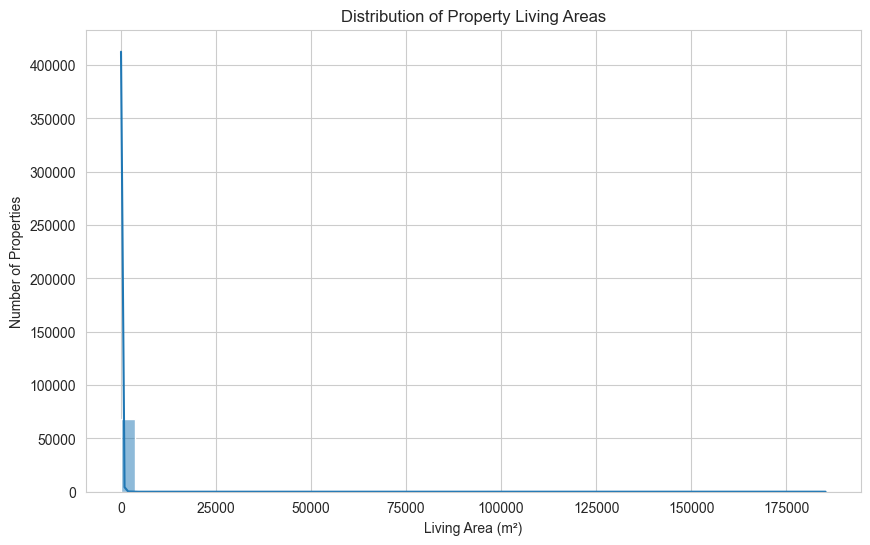

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df["habitablesurface"].dropna(), bins=50, kde=True)
plt.title("Distribution of Property Living Areas")
plt.xlabel("Living Area (m²)")
plt.ylabel("Number of Properties")
plt.show()



*** UNNAMED:_0 ***


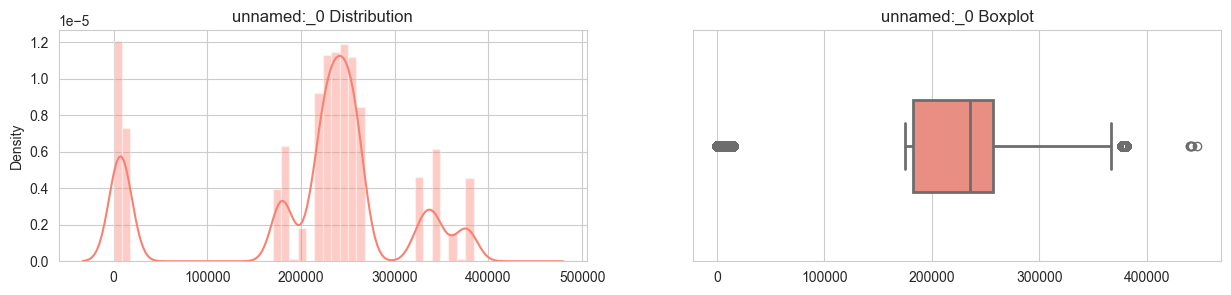


*** ID ***


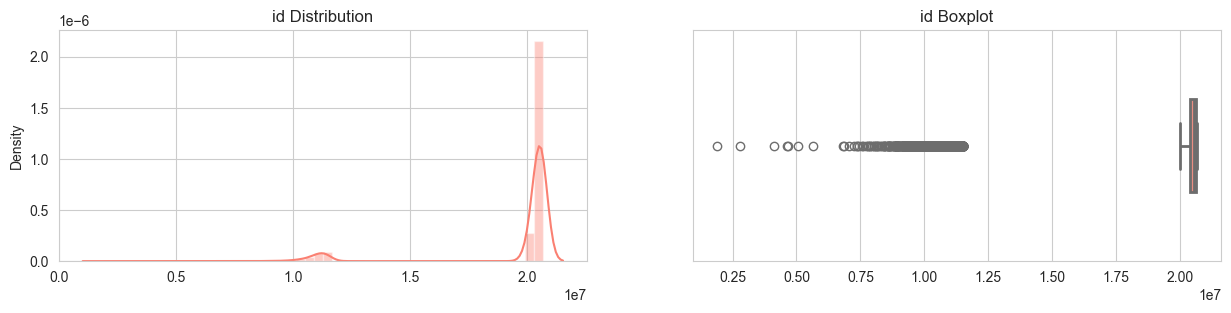


*** BEDROOMCOUNT ***


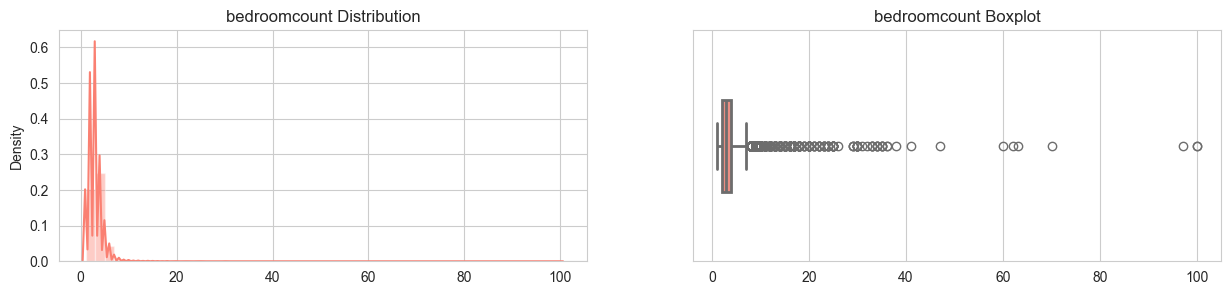


*** BATHROOMCOUNT ***


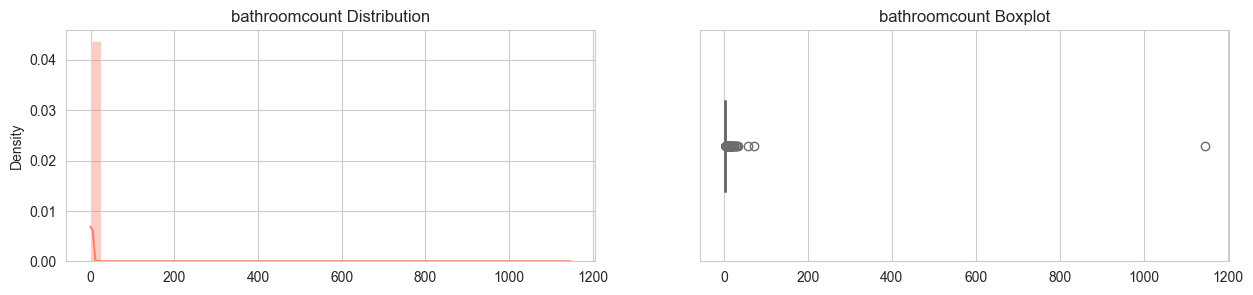


*** POSTCODE ***


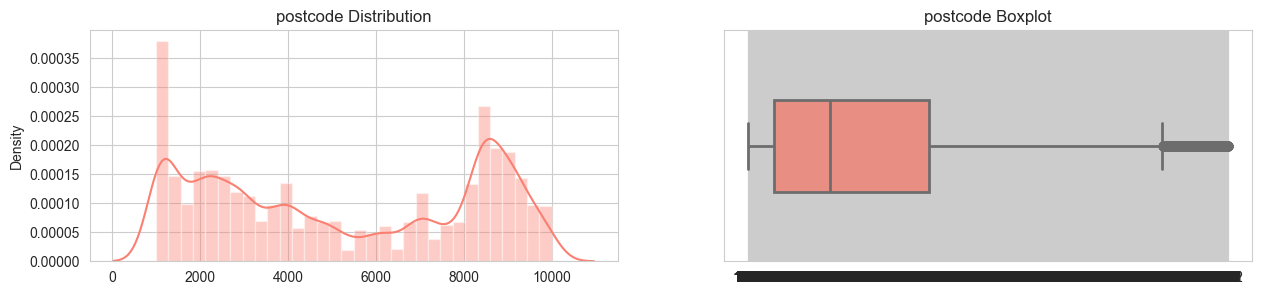


*** HABITABLESURFACE ***


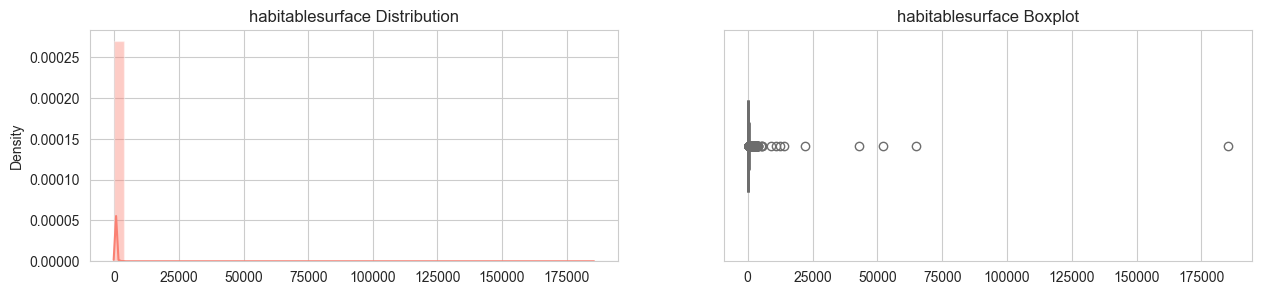


*** ROOMCOUNT ***


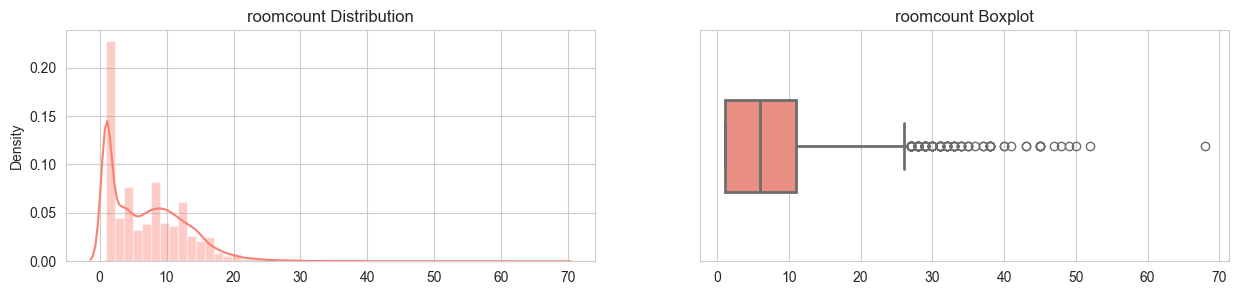


*** MONTHLYCOST ***


ValueError: List of boxplot statistics and `positions` values must have same the length

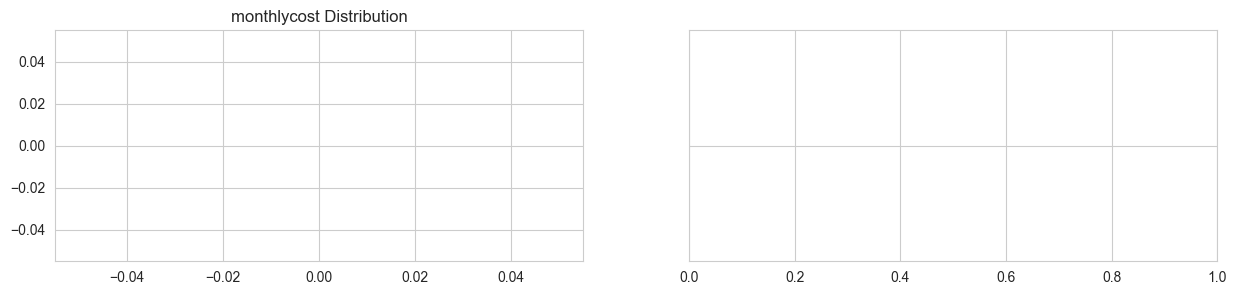

In [62]:
for i in numeric_cols:
    Plot_numeric(i)

In [ ]:
for i in categoric_cols:
    Plot_category(i)


*** URL ***


KeyboardInterrupt: 

In [ ]:
correlations = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 8))

# Shows only correlation above +/- 0.3
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Generate the report
profile = ProfileReport(df,title="Immoweb properties profile")

# Save the report to .html
profile.to_file("INITIALImmoweb properties profile.html")

In [ ]:
# 9.Save cleaned DataFrame
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"data is saved to: {output_path}")
